# Etudes des valeurs foncières Française
### Liens: https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Chargement du fichiers des valeurs foncières de 2018

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y') # 03/01/2018
#df = pd.read_csv('data/valeursfoncieres-clean-df.csv', parse_dates=['date_mutation'])
df = pd.read_csv('data/biens_2015-19.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765694 entries, 0 to 765693
Data columns (total 10 columns):
valeur_fonciere              765694 non-null float64
code_postal                  765694 non-null float64
commune                      765694 non-null object
code_departement             765694 non-null int64
type_local                   765694 non-null object
surface_reelle_bati          765694 non-null float64
nombre_pieces_principales    765694 non-null int64
surface_terrain              765694 non-null float64
year                         765694 non-null int64
month                        765694 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 58.4+ MB


In [13]:
df[(df['code_departement']==74) & (df['type_local']=="Maison") & (df['surface_terrain'] > 1500) & (df['surface_terrain'] < 2500)]

,valeur_fonciere,code_postal,commune,code_departement,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,year,month
100257,422050.0,74230.0,MANIGOD,74,Maison,85.0,5,2298.0,2015,1
100331,698000.0,74320.0,SEVRIER,74,Maison,155.0,5,1744.0,2015,1
100338,486500.0,74350.0,VILLY-LE-BOUVERET,74,Maison,231.0,7,2167.0,2015,2
100473,657377.0,74940.0,ANNECY LE VIEUX,74,Maison,137.0,6,2183.0,2015,2
100504,642000.0,74540.0,GRUFFY,74,Maison,136.0,4,2069.0,2015,2
...,...,...,...,...,...,...,...,...,...,...
704973,535000.0,74140.0,LOISIN,74,Maison,85.0,4,1837.0,2018,6
705098,561904.0,74140.0,SCIEZ,74,Maison,79.0,4,1595.0,2018,7
705165,514400.0,74200.0,MARIN,74,Maison,90.0,4,1571.0,2018,8
705265,1900000.0,74200.0,THONON LES BAINS,74,Maison,254.0,7,2097.0,2018,10


In [ ]:
df[(df['code_departement']==74) & (df['type_local']=="Maison") & (df['surface_terrain'] > 1500) & (df['surface_terrain'] < 2500)]

###  Analyse des colonnes

In [5]:
corr_pearson = df.corr(method='pearson', min_periods=10)['valeur_fonciere']
corr_kendall = df.corr(method='kendall')['valeur_fonciere']
corr_spearman = df.corr(method='spearman')['valeur_fonciere']

In [6]:
# Pearson
corr_pearson.sort_values()

nombre_pieces_principales    -0.017355
surface_carrez_du_2eme_lot   -0.000848
surface_carrez_du_5eme_lot    0.003035
surface_carrez_du_3eme_lot    0.004240
surface_carrez_du_4eme_lot    0.005438
surface_carrez_du_1er_lot     0.005899
surface_terrain               0.007912
nombre_de_lots                0.009303
surface_reelle_bati           0.015839
code_type_local               0.037401
valeur_fonciere               1.000000
Name: valeur_fonciere, dtype: float64

In [7]:
# Kendall
corr_kendall.sort_values()

surface_terrain              -0.144743
code_type_local              -0.016741
surface_carrez_du_5eme_lot    0.007122
surface_carrez_du_4eme_lot    0.009869
surface_carrez_du_3eme_lot    0.013442
surface_carrez_du_2eme_lot    0.033063
surface_carrez_du_1er_lot     0.063779
nombre_pieces_principales     0.118978
nombre_de_lots                0.166000
surface_reelle_bati           0.229832
valeur_fonciere               1.000000
Name: valeur_fonciere, dtype: float64

In [8]:
# Spearman
corr_spearman.sort_values()

surface_terrain              -0.209352
code_type_local              -0.020186
surface_carrez_du_5eme_lot    0.008714
surface_carrez_du_4eme_lot    0.012076
surface_carrez_du_3eme_lot    0.016450
surface_carrez_du_2eme_lot    0.040507
surface_carrez_du_1er_lot     0.077958
nombre_pieces_principales     0.154965
nombre_de_lots                0.209272
surface_reelle_bati           0.297715
valeur_fonciere               1.000000
Name: valeur_fonciere, dtype: float64

Sans trop de surprise, la valeur foncière d'un bien est majoritairement corrélée avec la surface des différents lots.
Aussi, le nombre de pièces principales est négativement corrélé.

Nous pouvons faire la somme des surfaces pour vérifier si la corrélation avec la valeur foncière est plus forte:

#### No Disposition

In [9]:
df.no_disposition.dtype

AttributeError: 'DataFrame' object has no attribute 'no_disposition'

In [ ]:
def describe(df, col):
    return df[col].describe().apply(lambda x: format(x, 'f'))

In [ ]:
describe(df,'no_disposition')

#### Frequency count

In [ ]:
df.no_disposition.value_counts(dropna=False).head(20)

In [ ]:
df.no_disposition.unique()

In [ ]:
df.no_disposition.isnull().sum()

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.distplot(df.no_disposition, kde=False)
ax.set_yscale('log', basey=2)
ax.set_title('Distribution de l\'attribut \'N° de disposition\'')

In [ ]:
df.no_disposition.corr(df.valeur_fonciere)

Text(0, 0.5, 'Valeur foncière')

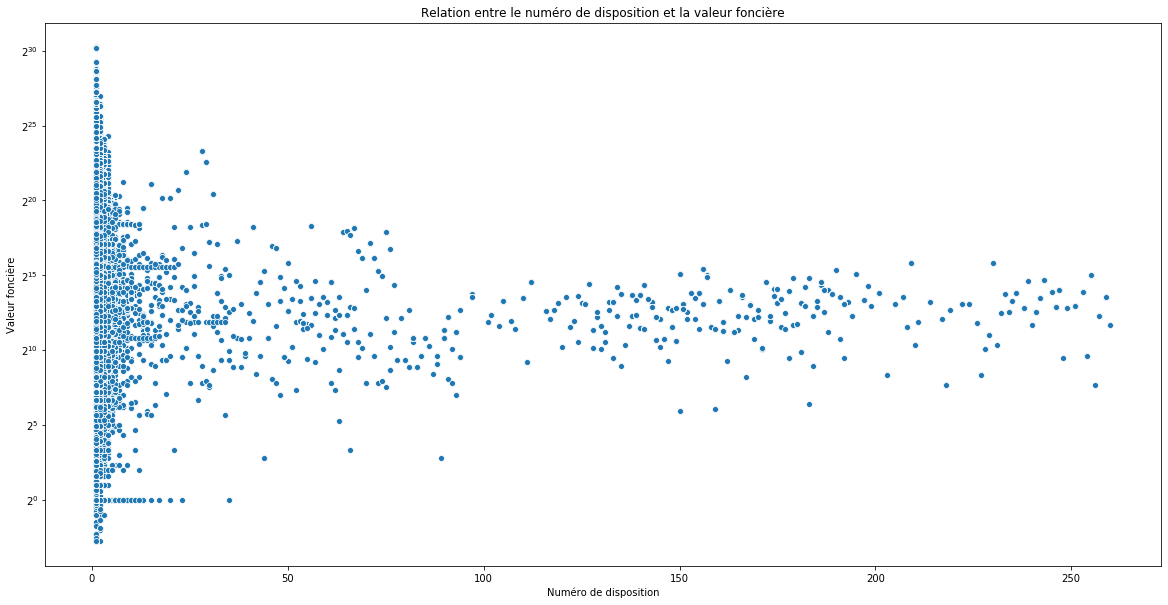

In [22]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=df.no_disposition, y=df.valeur_fonciere)
ax.set_yscale('log', basey=2)
ax.set_title('Relation entre le numéro de disposition et la valeur foncière')
ax.set_xlabel('Numéro de disposition')
ax.set_ylabel('Valeur foncière')

#### Date de mutation

In [23]:
df.date_mutation.dtype

dtype('<M8[ns]')

Text(0, 0.5, 'Nombre de mutation')

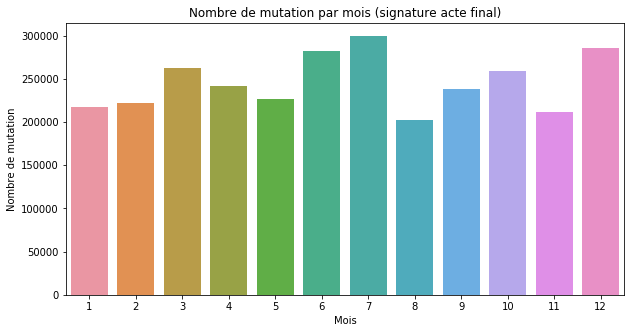

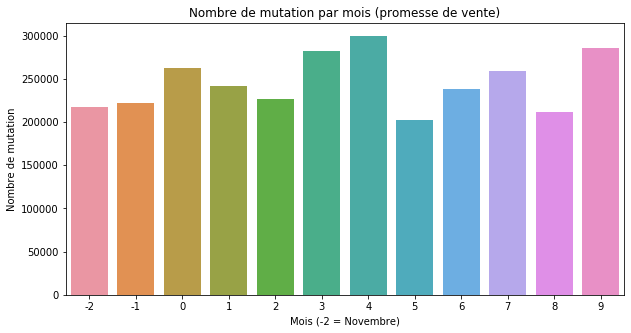

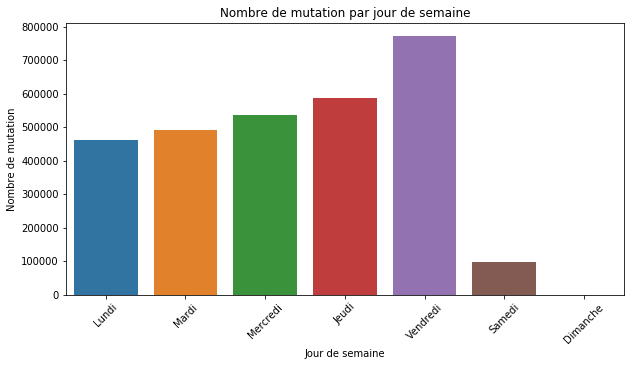

In [24]:
plt.figure(figsize=(10,5))
df['month'] = df.date_mutation.map(lambda x: x.month)
ax = sns.countplot(x=df.month)
ax.set_title('Nombre de mutation par mois (signature acte final)')
ax.set_xlabel('Mois')
ax.set_ylabel('Nombre de mutation')

plt.figure(figsize=(10,5))
df['sign_month'] = df.date_mutation.map(lambda x: x.month-3)
ax = sns.countplot(x=df.sign_month)
ax.set_title('Nombre de mutation par mois (promesse de vente)')
ax.set_xlabel('Mois (-2 = Novembre)')
ax.set_ylabel('Nombre de mutation')

plt.figure(figsize=(10,5))
df['dayofweek'] = df.date_mutation.map(lambda x: x.dayofweek)
ax = sns.countplot(x=df.dayofweek)
ax.set_title('Nombre de mutation par jour de semaine')
ax.set_xlabel('Jour de semaine')
ax.set_xticklabels(['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'],rotation=45)
ax.set_ylabel('Nombre de mutation')

Nombre de signature signée le dimanche:

In [25]:
len(df[df['dayofweek']==6])

927

#### Nature de mutation

In [26]:
df.nature_mutation.dtype

dtype('O')

In [27]:
df.nature_mutation.unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir', 'Adjudication', 'Expropriation'],
      dtype=object)

In [28]:
df.nature_mutation.value_counts()

Vente                                 2649843
Vente en l'état futur d'achèvement     236054
Echange                                 41697
Vente terrain à bâtir                   12253
Adjudication                             9437
Expropriation                            1566
Name: nature_mutation, dtype: int64

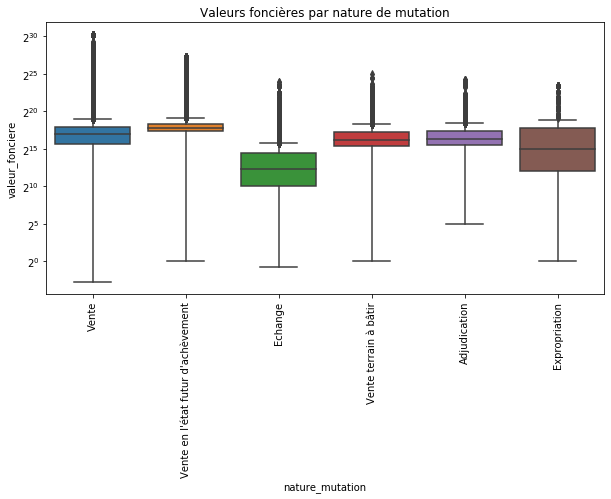

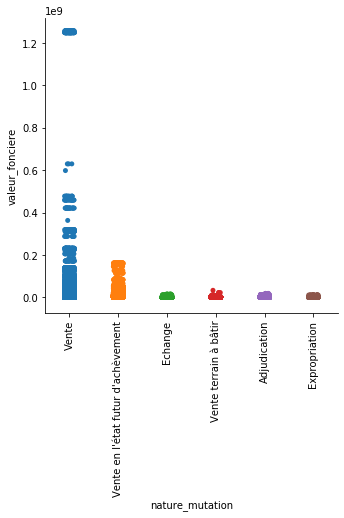

In [29]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="nature_mutation", y="valeur_fonciere", data=df);
ax.set_yscale('log', basey=2)
ax.set_xticklabels(labels=df.nature_mutation.unique(), rotation=90)
ax.set_title('Valeurs foncières par nature de mutation')

ax = sns.catplot(x="nature_mutation", y="valeur_fonciere", data=df);
ax.set_xticklabels(rotation=90)

##### Etude des expropriations

In [30]:
df_ex = df[df['nature_mutation']=='Expropriation'].sort_values(by='valeur_fonciere', ascending=False)
df_ex.head(1)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,...,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,month,sign_month,dayofweek
23907,28,2018-09-12,Expropriation,10455340.0,NaN,NaN,NaN,B014,TRES LA GRANGE,1210.0,...,NaN,NaN,NaN,NaN,T,NaN,7407.0,9,6,2


L'expropriation la plus chère est à - code postal 01210 - Ferney-Voltaire dans l'Ain. Une ville à la frontière de la Suisse, avec l'aéroport Genevois à quelques centaines de mètres.

In [31]:
df_ex.commune.value_counts().head()

VIEVILLE            718
FERNEY-VOLTAIRE     106
MASSY               100
CACHAN               44
CLICHY SOUS BOIS     40
Name: commune, dtype: int64

Text(0.5, 1.0, "Nombre d'expropriation par ville")

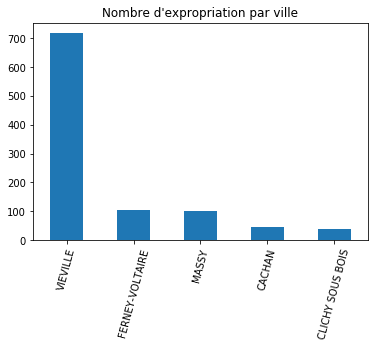

In [32]:
ax = df_ex.commune.value_counts().head().plot.bar(rot=75)
ax.set_title('Nombre d\'expropriation par ville')

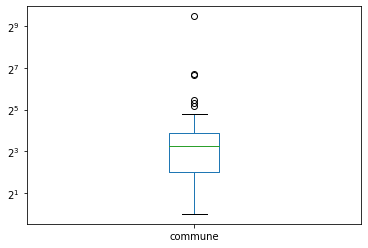

In [33]:
ax = df_ex.commune.value_counts().plot.box()
ax.set_yscale('log', basey=2)

Toutefois, la ville de Vieville - code postal 52310 - a enregistré le plus grand nombre d'expropriation en 2018.

##### Etude des ventes

In [34]:
pd.options.display.max_columns = None
df_ve = df[df['nature_mutation']=='Vente'].sort_values(by='valeur_fonciere', ascending=False)
df_ve.head(1)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,commune,code_departement,code_commune,prefixe_de_section,section,no_plan,no_volume,1er_lot,surface_carrez_du_1er_lot,2eme_lot,surface_carrez_du_2eme_lot,3eme_lot,surface_carrez_du_3eme_lot,4eme_lot,surface_carrez_du_4eme_lot,5eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,month,sign_month,dayofweek
2826340,1,2018-09-18,Vente,1.256966e+09,44.0,NaN,AV,7121,DE PARIS,92320.0,CHATILLON,92,20,NaN,I,250,NaN,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,9,6,1


La vente la plus chère a été réalisé dans la commune de Châtillon - code postal 92320 - pour un montant de 1.256.966.000€ au 44 avenue de Paris.
La ville de Chatillon a réalisé plusieurs transactions du même montant, le même jour. Cela semble plus être la vente d'un lot d'immeuble entre plusieurs organisations.

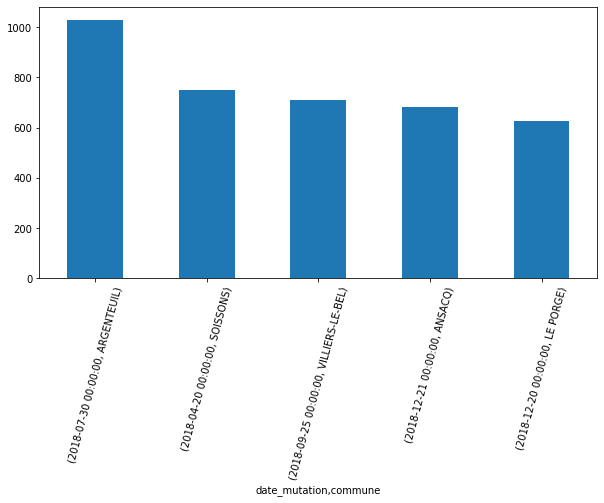

In [35]:
plt.figure(figsize=(10,5))
df_vente_par_jour = df[df['nature_mutation']=='Vente'].groupby(['date_mutation','commune'])['commune'].count().sort_values(ascending=False)
#df_vente_par_jour[0:5]
df_vente_par_jour[0:5].head(10).plot.bar(x='Commune', rot=75)

La ville d'Argenteuil est la commune qui a enregistré le plus de vente le même jour: 1030 ventes le 30 Juillet 2018. Suivi par la commune de Soissons avec 749 ventes le 20 Avril 2018.

In [36]:
hab_argenteuil = 11210 # source Wikipedia
print("Vente par habitant à {} le {}: {}".format(df_vente_par_jour.index[0][1],df_vente_par_jour.index[0][0],round(hab_argenteuil/df_vente_par_jour[0],2)))
hab_soissons = 28530 # source Wikipedia
print("Vente par habitant à {} le {}: {}".format(df_vente_par_jour.index[1][1],df_vente_par_jour.index[1][0], round(hab_soissons/df_vente_par_jour[1],2)))

Vente par habitant à ARGENTEUIL le 2018-07-30 00:00:00: 10.88
Vente par habitant à SOISSONS le 2018-04-20 00:00:00: 38.09


Text(0.5, 1.0, 'Nombre de vente par ville')

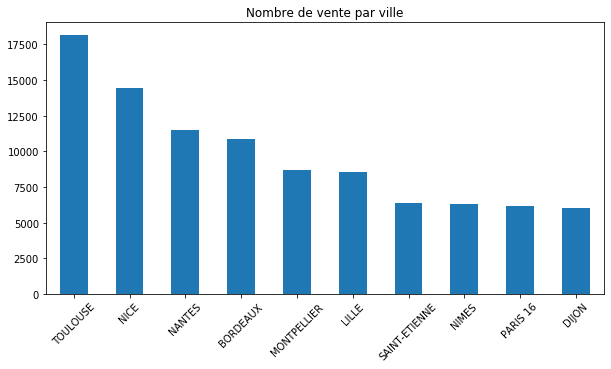

In [37]:
se_vente_commune = df_ve.commune.value_counts()
plt.figure(figsize=(10,5))
ax = se_vente_commune.head(10).plot.bar(x='Commune', rot=45)
ax.set_title('Nombre de vente par ville')

La ville de Toulouse a enregistré le plus grand nombre de vente en 2018, suivi par Nice et Nantes.

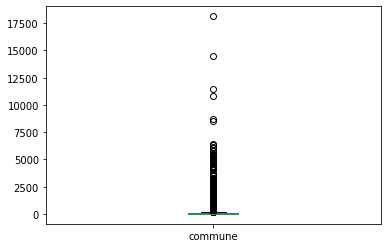

In [38]:
se_vente_commune.plot.box()

In [85]:
se_vente_commune.head(10).index

Index(['TOULOUSE', 'NICE', 'NANTES', 'BORDEAUX', 'MONTPELLIER', 'LILLE',
       'SAINT-ETIENNE', 'NIMES', 'PARIS 16', 'DIJON'],
      dtype='object')

In [108]:
df_best_city = df_ve[df_ve['commune'].isin(se_vente_commune.head(10).index)]
df_best_city = df_best_city[df_best_city.valeur_fonciere < df_best_city.valeur_fonciere.quantile(.95)]
df_best_city = df_best_city[df_best_city.valeur_fonciere > df_best_city.valeur_fonciere.quantile(.05)]

In [115]:
order=df_best_city.valeur_fonciere.groupby(df_best_city.commune).median().sort_values(ascending=False)

In [116]:
order

commune
PARIS 16         472159.0
BORDEAUX         260000.0
NICE             200000.0
LILLE            175000.0
NANTES           172000.0
TOULOUSE         159000.0
MONTPELLIER      150000.0
NIMES            129000.0
DIJON            126550.0
SAINT-ETIENNE     83000.0
Name: valeur_fonciere, dtype: float64

In [117]:
df_best_city.head()

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,commune,code_departement,code_commune,prefixe_de_section,section,no_plan,no_volume,1er_lot,surface_carrez_du_1er_lot,2eme_lot,surface_carrez_du_2eme_lot,3eme_lot,surface_carrez_du_3eme_lot,4eme_lot,surface_carrez_du_4eme_lot,5eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,month,sign_month,dayofweek
3030073,1,2018-01-12,Vente,1499740.0,2.0,NaN,AV,8145,RENE BOYLESVE,75016.0,PARIS 16,75,116,NaN,CF,33,NaN,30,142.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,129.0,3.0,NaN,NaN,NaN,1,-2,4
3030071,1,2018-01-12,Vente,1499740.0,2.0,NaN,AV,8145,RENE BOYLESVE,75016.0,PARIS 16,75,116,NaN,CF,33,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,9.0,1.0,NaN,NaN,NaN,1,-2,4
3030072,1,2018-01-12,Vente,1499740.0,2.0,NaN,AV,8145,RENE BOYLESVE,75016.0,PARIS 16,75,116,NaN,CF,33,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,1,-2,4
3030537,1,2018-02-12,Vente,1498000.0,3.0,NaN,RUE,5901,DE MAGDEBOURG,75016.0,PARIS 16,75,116,NaN,FR,54,NaN,12,NaN,13,NaN,31,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,240.0,5.0,NaN,NaN,NaN,2,-1,0
3030902,1,2018-03-07,Vente,1495550.0,24.0,NaN,AV,5294,DE LAMBALLE,75016.0,PARIS 16,75,116,NaN,CE,3,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,3,0,2


Text(0, 0.5, 'Valeur foncière')

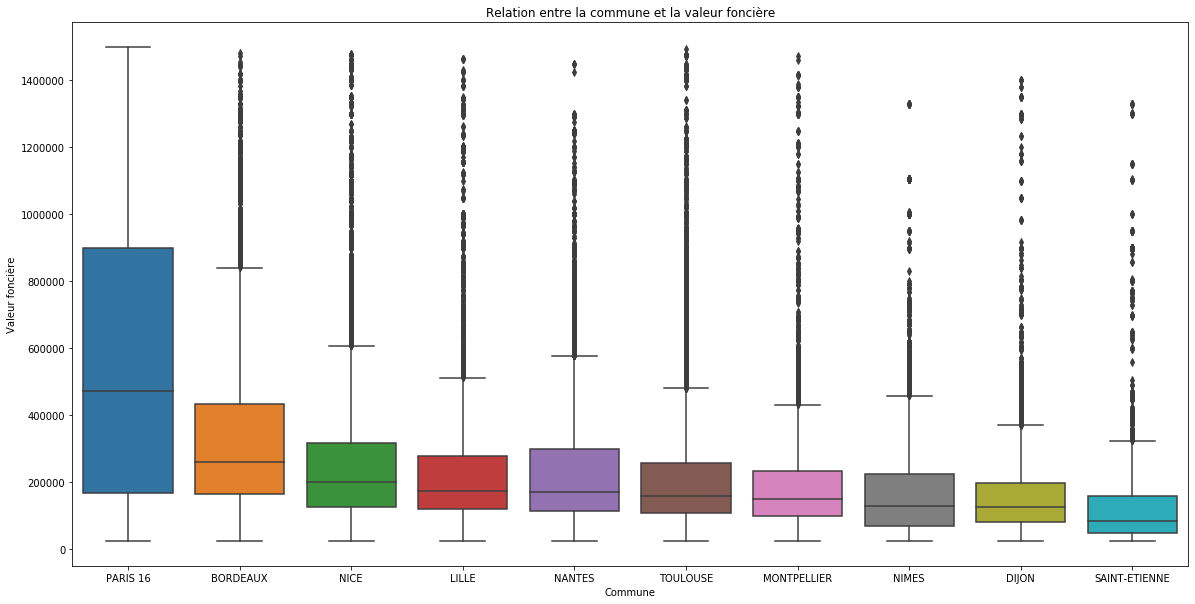

In [118]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df_best_city.commune, y=df_best_city.valeur_fonciere, order=order.index)
#ax.set_yscale('log', basey=2)
ax.set_title('Relation entre la commune et la valeur foncière')
ax.set_xlabel('Commune')
ax.set_ylabel('Valeur foncière')

In [121]:
df_ve[df_ve['commune']=='SAINT-ETIENNE'].valeur_fonciere.median()

81000.0

##### Etude des vente en l'état futur d'achèvement

In [ ]:
df_vefa = df[df['nature_mutation']=='Vente en l\'état futur d\'achèvement'].sort_values(by='valeur_fonciere', ascending=False)
df_vefa.head(1)

La vente en l'état futur d'achèvement la plus chère est de 161.633.440€ réalisée le 1er Août 2018. L'adresse correspond à la mairie du 4éme arrondissement de Paris.

In [ ]:
se_vefa_commune = df_vefa.commune.value_counts()
ax = se_vefa_commune.head(10).plot.bar(x='Commune', rot=45)
ax.set_title('Nombre de vefa par ville')

La ville de Toulouse est aussi la ville qui a enregistré le plus grand nombre de Vefa en 2018. Suivi par la ville de Nantes (2éme dans le classement des Ventes). Nice, 3éme dans le classement des ventes, reste dans le top 10 des villes avec le plus de Vefa.

In [ ]:
se_vefa_commune.plot.box()

##### Etude des ventes de terrain à bâtir

In [ ]:
df_vtb = df[df['nature_mutation']=='Vente terrain à bâtir'].sort_values(by='valeur_fonciere', ascending=False)
df_vtb.head(3)

La vente de terrain la plus chère a été réalisé à la Fos-Sur-Mer pour un montant de 32.760.000€ pour une surface de terrain à bâtir de 42.753 m2

In [ ]:
se_vtb_commune = df_vtb.commune.value_counts()
ax = se_vtb_commune.head(10).plot.bar(x='Commune', rot=75)
ax.set_title('Nombre de vtb par ville')

La ville des Castelnau-le-lez enregistre le plus grand nombre de vente de terrain à bâtir.

##### Numéro de voie

In [ ]:
df['no_voie'].isnull().sum()

In [ ]:
plt.figure(figsize=(30,10))
df['no_voie'].value_counts().head(50).plot(kind="bar", position=1)

Alors qu'il y a une continuité dans la diminutaion de la fréquence des numéro de voies, il y a moins de numéro 13 que de numéro 14. Il y a aussi moins de numéro 9 que de numéro 10.
Le fait étrange est qu'il y a le numéro 9001 qui arrive dnas le top 20 des numéros de rue.

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=df.no_voie, y=df.valeur_fonciere)
ax.set_yscale('log', basey=2)
ax.set_title('Relation entre le n° de voie et la valeur foncière')
ax.set_xlabel('N° de voie')
ax.set_ylabel('Valeur foncière (log2)')

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=df_voie_vafonc.no_voie, y=df_voie.valeur_fonciere)
ax.set_yscale('log', basey=2)
ax.set_title('Relation entre la quantité d\'un numéro de voie et la valeur foncière')
ax.set_xlabel('N° de voie')
ax.set_ylabel('Valeur foncière (log2)')

In [ ]:
df.no_voie.plot.box()

Il sera probablement de se servir de cet attribut tant la donnée semble aberrante. Il semble qu'il y est un mixte entre plusieurs colonnes (code voie?). Plusieurs numéro de voie commence à 5000 et un deuxième groupe à 9000.

##### Etude de la colonne b/t/q

In [ ]:
df['b/t/q'].isnull().sum()

Cette colonne est quasi-vide.

##### Etude de la colonne Type de voie

In [ ]:
df['type_de_voie'].isnull().sum()

In [ ]:
se_type_de_voie = df.type_de_voie.value_counts()
ax = se_type_de_voie.head(10).plot.bar(rot=75)
ax.set_title('Quantité des types de voie')

La majorité des biens en mutation en 2018 sont dans des rues, suivi par les avenues

In [ ]:
df_type_de_voie = df.groupby('type_de_voie', as_index=False)['valeur_fonciere'].median()
df_type_de_voie.sort_values('valeur_fonciere', ascending=False).head(20).plot(kind="bar", x='type_de_voie')

In [ ]:
df_type_de_voie.plot.box()

##### Etude des communes

In [ ]:
df['commune'].isnull().sum()

In [ ]:
df_commune = df.groupby('commune', as_index=False)['valeur_fonciere'].mean()
df_commune.sort_values('valeur_fonciere', ascending=False).head(10).plot(kind="bar", x='commune', title='Moyenne des ventes par communes',figsize=(30,10))

In [ ]:
df_commune = df.groupby('commune', as_index=False)['valeur_fonciere'].median()
df_commune.sort_values('valeur_fonciere', ascending=False).head(10).plot(kind="bar", x='commune', title='Moyenne des ventes par communes',figsize=(30,10))